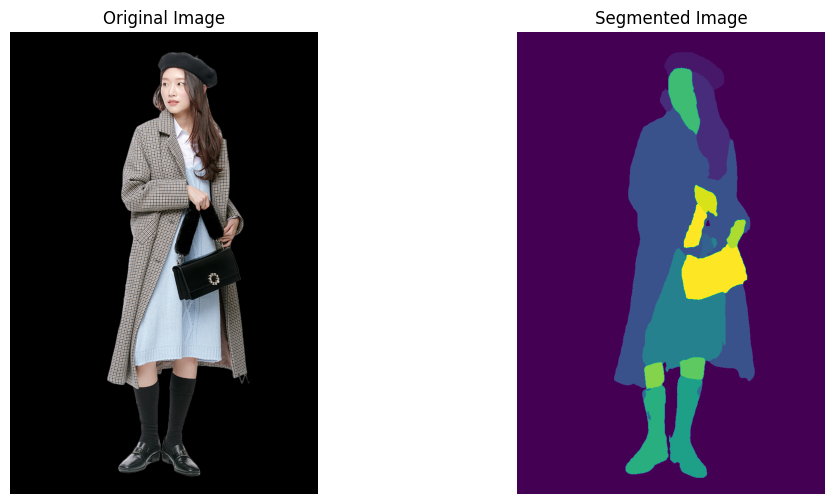

In [11]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

image_path = "./romantic_13115_no_bg (1).png"
image = Image.open(image_path)

# 이미지를 RGB 모드로 변환
image = image.convert("RGB")

# 이미지를 텐서로 변환
image_tensor = torch.tensor(np.array(image))

inputs = processor(images=image_tensor, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

# 이미지와 세분화된 이미지를 함께 표시
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(pred_seg, cmap='viridis')  # 변경 가능한 컬러맵 설정
axes[1].set_title('Segmented Image')
axes[1].axis('off')

plt.show()
